### Chicago Census, School, and Crime Data Overview

The datasets can be obtained from the Chicago Data Portal.
1. Socioeconomic Indicators (2008-2012)
2. Public Schools (2011-2012)
3. Crime Data (2001-present) minus the most recent 7 days

!pip install ipython-sql prettytable
import prettytable
prettytable.DEFAULT = 'DEFAULT'
%load_ext sql

In [526]:
import csv, sqlite3

con = sqlite3.connect("FinalDB.db")
cur = con.cursor()
!pip install pandas 

In [220]:
# Connect to the database
%sql sqlite:///FinalDB.db

In [221]:
# Load the datasets into separate DataFrames
import pandas
census_df = pandas.read_csv('ChicagoCensusData.csv')
schools_df = pandas.read_csv('ChicagoPublicSchools.csv')
crime_df = pandas.read_csv('ChicagoCrimeData.csv')

census_df.to_sql("ChicagoCensusData", con, if_exists='replace', index=False,method="multi")
schools_df.to_sql("ChicagoPublicSchools", con, if_exists='replace', index=False,method="multi")
crime_df.to_sql("ChicagoCrimeData", con, if_exists='replace', index=False,method="multi")

533

In [273]:
%sql SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///FinalDB.db
Done.


name
ChicagoCensusData
ChicagoPublicSchools
ChicagoCrimeData


#### Q1. Find the total number of crimes in the CRIME table

In [224]:
%sql SELECT * FROM ChicagoCrimeData limit 5;

 * sqlite:///FinalDB.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.8074405,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,0,0,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,0,0,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,0,0,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,0,0,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.7734553,-87.70648047,"(41.773455295, -87.706480471)"


In [225]:
%sql SELECT 'The number of total crimes is: ' || COUNT(*) AS Message FROM ChicagoCrimeData;

 * sqlite:///FinalDB.db
Done.


Message
The number of total crimes is: 533


In [464]:
#%sql SELECT PRIMARY_TYPE, COUNT(*) AS FREQUENCY FROM ChicagoCrimeData GROUP BY PRIMARY_TYPE ORDER BY FREQUENCY DESC;

 * sqlite:///FinalDB.db
Done.


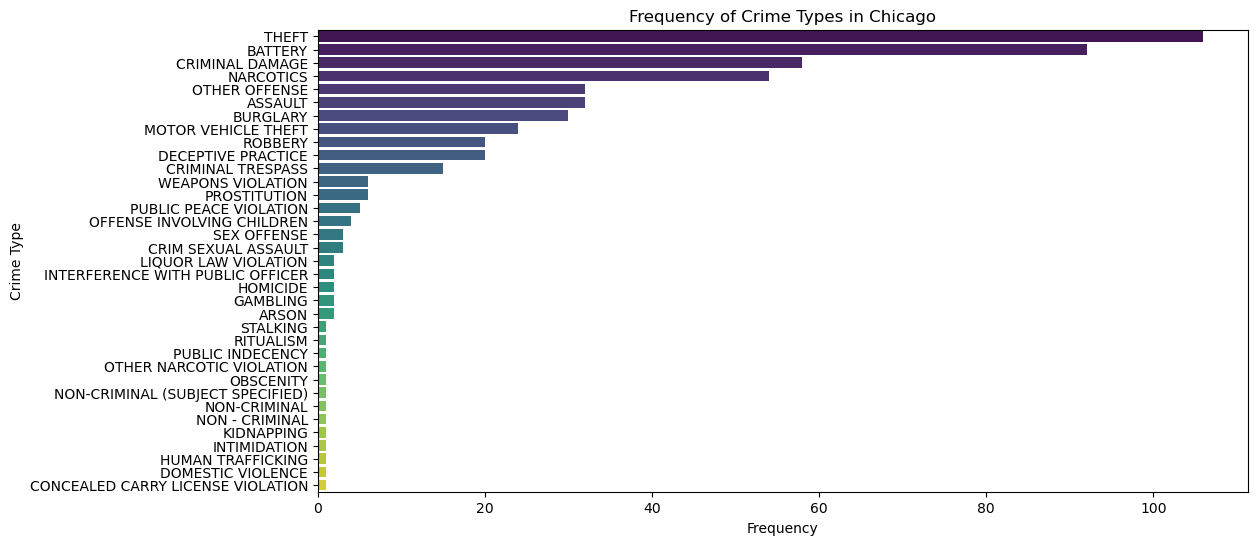

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Execute the SQL query to get the frequency of crime types
crime_data = %sql SELECT PRIMARY_TYPE, COUNT(*) AS FREQUENCY FROM ChicagoCrimeData GROUP BY PRIMARY_TYPE ORDER BY FREQUENCY DESC;

# Convert the result to a DataFrame
crime_df = crime_data.DataFrame()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=crime_df, x='FREQUENCY', y='PRIMARY_TYPE', hue='PRIMARY_TYPE', palette='viridis', legend=False)

# Add titles and labels
plt.title('Frequency of Crime Types in Chicago')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')

# Show the plot
plt.show()


In [466]:
#%sql SELECT COUNT(DISTINCT PRIMARY_TYPE) AS UNIQUE_CRIME_COUNT FROM ChicagoCrimeData;

In [229]:
%sql SELECT 'The number of unique crimes is: ' || COUNT(DISTINCT PRIMARY_TYPE) AS Message FROM ChicagoCrimeData;

 * sqlite:///FinalDB.db
Done.


Message
The number of unique crimes is: 35


##### Answer to Q1. 
The total number of crimes recorded from 2001 to the present (except for murder) is 533. These consist of 35 types of crimes, the most common being theft. 

#### Q2. List the community area names and numbers with per capita income less than 11000.

In [468]:
#%sql SELECT * FROM ChicagoCensusData limit 5;

In [279]:
%sql SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, PER_CAPITA_INCOME FROM ChicagoCensusData WHERE PER_CAPITA_INCOME < 11000;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER,PER_CAPITA_INCOME
West Garfield Park,26.0,10934
South Lawndale,30.0,10402
Fuller Park,37.0,10432
Riverdale,54.0,8201


#### Q3. List all case numbers for crimes involving minors.
(Children are not considered minors for the purposes of crime analysis) 

In [470]:
#%sql SELECT CASE_NUMBER FROM ChicagoCrimeData WHERE DESCRIPTION LIKE '%MINOR%';

In [307]:
%sql SELECT CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION FROM ChicagoCrimeData WHERE DESCRIPTION LIKE '%minor%' ORDER BY CASE_NUMBER;

 * sqlite:///FinalDB.db
Done.


CASE_NUMBER,PRIMARY_TYPE,DESCRIPTION
HK238408,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR
HL266884,LIQUOR LAW VIOLATION,SELL/GIVE/DEL LIQUOR TO MINOR


#### Q4. List all kidnapping crimes involving a child.

In [302]:
%sql SELECT CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION, DATE, BLOCK, LOCATION_DESCRIPTION FROM ChicagoCrimeData WHERE PRIMARY_TYPE = 'KIDNAPPING'

 * sqlite:///FinalDB.db
Done.


CASE_NUMBER,PRIMARY_TYPE,DESCRIPTION,DATE,BLOCK,LOCATION_DESCRIPTION
HN144152,KIDNAPPING,CHILD ABDUCTION/STRANGER,2007-01-26,050XX W VAN BUREN ST,STREET


#### Q5. List the kind of crimes that were recorded at schools (exclude repetitions)

In [337]:
#%sql SELECT LOCATION_DESCRIPTION, COUNT(*) AS FREQUENCY FROM ChicagoCrimeData GROUP BY LOCATION_DESCRIPTION ORDER BY FREQUENCY DESC;

In [335]:
#%sql SELECT PRIMARY_TYPE, CASE_NUMBER, LOCATION_DESCRIPTION FROM ChicagoCrimeData WHERE LOCATION_DESCRIPTION LIKE '%school%' 

In [333]:
%sql SELECT DISTINCT PRIMARY_TYPE FROM ChicagoCrimeData WHERE LOWER(LOCATION_DESCRIPTION) LIKE '%school%' 

 * sqlite:///FinalDB.db
Done.


PRIMARY_TYPE
BATTERY
CRIMINAL DAMAGE
NARCOTICS
ASSAULT
CRIMINAL TRESPASS
PUBLIC PEACE VIOLATION


#### Q6. List the type of schools with the average safety score for each.

Since there is no column with safety scores, I will compute the average number of incidents associated with the types of schools, and assign weights to types of crime to calculate an approximation of an average "safety score". 

In [352]:
# List types of schools and location.
%sql SELECT DISTINCT LOCATION_DESCRIPTION FROM ChicagoCrimeData WHERE LOCATION_DESCRIPTION LIKE '%school%';

 * sqlite:///FinalDB.db
Done.


LOCATION_DESCRIPTION
"SCHOOL, PUBLIC, GROUNDS"
"SCHOOL, PUBLIC, BUILDING"
"SCHOOL, PRIVATE, BUILDING"


In [417]:
# Count number of crimes (of any type), sorted by a distinct type of school
%sql SELECT LOCATION_DESCRIPTION, COUNT(*) AS PRIMARY_TYPE FROM ChicagoCrimeData WHERE LOCATION_DESCRIPTION LIKE '%school%' GROUP BY LOCATION_DESCRIPTION ORDER BY PRIMARY_TYPE DESC;

 * sqlite:///FinalDB.db
Done.


LOCATION_DESCRIPTION,PRIMARY_TYPE
"SCHOOL, PUBLIC, GROUNDS",6
"SCHOOL, PUBLIC, BUILDING",5
"SCHOOL, PRIVATE, BUILDING",1


In [426]:
# This time also include the type of crime
%sql SELECT PRIMARY_TYPE, LOCATION_DESCRIPTION, COUNT(*) AS PRIMARY_TYPE FROM ChicagoCrimeData WHERE LOCATION_DESCRIPTION LIKE '%school%' GROUP BY PRIMARY_TYPE, LOCATION_DESCRIPTION ORDER BY PRIMARY_TYPE DESC;

 * sqlite:///FinalDB.db
Done.


PRIMARY_TYPE,LOCATION_DESCRIPTION,PRIMARY_TYPE_1
BATTERY,"SCHOOL, PUBLIC, BUILDING",3
BATTERY,"SCHOOL, PUBLIC, GROUNDS",2
ASSAULT,"SCHOOL, PUBLIC, GROUNDS",1
CRIMINAL DAMAGE,"SCHOOL, PUBLIC, GROUNDS",1
CRIMINAL TRESPASS,"SCHOOL, PUBLIC, GROUNDS",1
NARCOTICS,"SCHOOL, PUBLIC, BUILDING",1
NARCOTICS,"SCHOOL, PUBLIC, GROUNDS",1
PUBLIC PEACE VIOLATION,"SCHOOL, PRIVATE, BUILDING",1
PUBLIC PEACE VIOLATION,"SCHOOL, PUBLIC, BUILDING",1


Assign weights to the type of crime and explain rationale\
| Crime Type | Weight | Rationale | \
| Battery | 8 | High severity due to potential physical harm and emotional distress to victims. | \
| Assault | 8 | Similar to battery; involves threats or attempts to cause harm, high emotional impact. |\
| Criminal Damage | 5 | Moderate severity; affects property, but does not directly harm individuals. |\
| Criminal Trespass | 3 | Lower severity; primarily a property crime, usually does not involve direct harm. |\
| Narcotics | 6 | Moderate to high weight; can lead to significant societal issues, including health risks. |\
| Public Peace Violation| 4 | Lower to moderate weight; disrupts community order but typically does not involve harm. |

In [474]:
# Calculate an "average safety score" for each school and location 
import pandas as pd

# Input data
data = {
    "PRIMARY_TYPE": ["BATTERY", "BATTERY", "ASSAULT", "CRIMINAL DAMAGE", "CRIMINAL TRESPASS", 
                     "NARCOTICS", "NARCOTICS", "PUBLIC PEACE VIOLATION", "PUBLIC PEACE VIOLATION"],
    "LOCATION_DESCRIPTION": ["SCHOOL, PUBLIC, BUILDING", "SCHOOL, PUBLIC, GROUNDS", "SCHOOL, PUBLIC, GROUNDS",
                              "SCHOOL, PUBLIC, GROUNDS", "SCHOOL, PUBLIC, GROUNDS", "SCHOOL, PUBLIC, BUILDING",
                              "SCHOOL, PUBLIC, GROUNDS", "SCHOOL, PRIVATE, BUILDING", "SCHOOL, PUBLIC, BUILDING"],
    "PRIMARY_TYPE_1": [3, 2, 1, 1, 1, 1, 1, 1, 1]
}

weights = {
    "BATTERY": 8,
    "ASSAULT": 8,
    "CRIMINAL DAMAGE": 5,
    "CRIMINAL TRESPASS": 3,
    "NARCOTICS": 6,
    "PUBLIC PEACE VIOLATION": 4
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a weight column based on PRIMARY_TYPE
df["Weight"] = df["PRIMARY_TYPE"].map(weights)

# Calculate weighted scores (incidents * weight)
df["Weighted_Score"] = df["PRIMARY_TYPE_1"] * df["Weight"]

# Group by LOCATION_DESCRIPTION and calculate average safety score
result = df.groupby("LOCATION_DESCRIPTION").agg(
    Total_Weighted_Score=("Weighted_Score", "sum"),
    Total_Incidents=("PRIMARY_TYPE_1", "sum")
).reset_index()

# Calculate average safety score
result["Average_Safety_Score"] = round(result["Total_Weighted_Score"] / result["Total_Incidents"], 2)

# Display results
print(result)


        LOCATION_DESCRIPTION  Total_Weighted_Score  Total_Incidents  \
0  SCHOOL, PRIVATE, BUILDING                     4                1   
1   SCHOOL, PUBLIC, BUILDING                    34                5   
2    SCHOOL, PUBLIC, GROUNDS                    38                6   

   Average_Safety_Score  
0                  4.00  
1                  6.80  
2                  6.33  


In [476]:
import pandas as pd

# Input data
data = {
    "PRIMARY_TYPE": ["BATTERY", "BATTERY", "ASSAULT", "CRIMINAL DAMAGE", "CRIMINAL TRESPASS", 
                     "NARCOTICS", "NARCOTICS", "PUBLIC PEACE VIOLATION", "PUBLIC PEACE VIOLATION"],
    "LOCATION_DESCRIPTION": ["SCHOOL, PUBLIC, BUILDING", "SCHOOL, PUBLIC, GROUNDS", "SCHOOL, PUBLIC, GROUNDS",
                              "SCHOOL, PUBLIC, GROUNDS", "SCHOOL, PUBLIC, GROUNDS", "SCHOOL, PUBLIC, BUILDING",
                              "SCHOOL, PUBLIC, GROUNDS", "SCHOOL, PRIVATE, BUILDING", "SCHOOL, PUBLIC, BUILDING"],
    "PRIMARY_TYPE_1": [3, 2, 1, 1, 1, 1, 1, 1, 1]
}

weights = {
    "BATTERY": 8,
    "ASSAULT": 8,
    "CRIMINAL DAMAGE": 5,
    "CRIMINAL TRESPASS": 3,
    "NARCOTICS": 6,
    "PUBLIC PEACE VIOLATION": 4
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a weight column based on PRIMARY_TYPE
df["Weight"] = df["PRIMARY_TYPE"].map(weights)

# Calculate weighted scores (incidents * weight)
df["Weighted_Score"] = df["PRIMARY_TYPE_1"] * df["Weight"]

# Combine locations for public schools
df["LOCATION_DESCRIPTION"] = df["LOCATION_DESCRIPTION"].replace(
    {"SCHOOL, PUBLIC, BUILDING": "SCHOOL, PUBLIC", "SCHOOL, PUBLIC, GROUNDS": "SCHOOL, PUBLIC"}
)

# Group by LOCATION_DESCRIPTION and calculate total weighted scores and total incidents
result = df.groupby("LOCATION_DESCRIPTION").agg(
    Total_Weighted_Score=("Weighted_Score", "sum"),
    Total_Incidents=("PRIMARY_TYPE_1", "sum")
).reset_index()

# Calculate average safety score
result["Average_Safety_Score"] = round(result["Total_Weighted_Score"] / result["Total_Incidents"], 2)

# Display results
print(result)

        LOCATION_DESCRIPTION  Total_Weighted_Score  Total_Incidents  \
0  SCHOOL, PRIVATE, BUILDING                     4                1   
1             SCHOOL, PUBLIC                    72               11   

   Average_Safety_Score  
0                  4.00  
1                  6.55  


#### Q7. List the community areas with highest % of households below poverty line.

In [480]:
%sql SELECT * FROM ChicagoCensusData LIMIT 1;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0


In [497]:
%sql SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM ChicagoCensusData ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
Riverdale,56.5
Fuller Park,51.2
Englewood,46.6
North Lawndale,43.1
East Garfield Park,42.4
Washington Park,42.1
West Garfield Park,41.7
Armour Square,40.1
Oakland,39.7
West Englewood,34.4


#### Q8. Which community area is most crime-prone?

In [492]:
%sql SELECT COMMUNITY_AREA_NUMBER, COUNT(*) AS PRIMARY_TYPE FROM ChicagoCrimeData GROUP BY COMMUNITY_AREA_NUMBER ORDER BY PRIMARY_TYPE DESC LIMIT 1;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER,PRIMARY_TYPE
25.0,43


The answer is the community area number 25.

#### Q9. Use a sub-query to find the name of the community area with highest hardship index.

In [499]:
%sql SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM ChicagoCensusData WHERE HARDSHIP_INDEX = (SELECT MAX(HARDSHIP_INDEX) FROM ChicagoCensusData);

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,HARDSHIP_INDEX
Riverdale,98.0


#### Q10. Use a sub-query to determine the Community Area Name with most number of crimes?

In [517]:
%sql SELECT COMMUNITY_AREA_NUMBER, PRIMARY_TYPE, COUNT(*) AS FREQUENCY FROM ChicagoCrimeData GROUP BY COMMUNITY_AREA_NUMBER, PRIMARY_TYPE ORDER BY FREQUENCY DESC LIMIT 2;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER,PRIMARY_TYPE,FREQUENCY
None,BATTERY,11
25.0,BATTERY,10


In [513]:
%sql SELECT COMMUNITY_AREA_NAME FROM ChicagoCensusData WHERE COMMUNITY_AREA_NUMBER = 25; 

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME
Austin


A.10. The city with the second highest number of crimes, following the top location which lacks an area number, is Austin.